Credit to Jason Brownlee's excellent series 

[link text](https://machinelearningmastery.com/introduction-to-time-series-forecasting-with-python/)

In [35]:
from google.colab import files
uploaded = files.upload()

Saving CornPrice1.csv to CornPrice1.csv


             value
date              
22/11/2005  1.9150
23/11/2005  1.9075
25/11/2005  1.9235
28/11/2005  1.9335
29/11/2005  1.9480


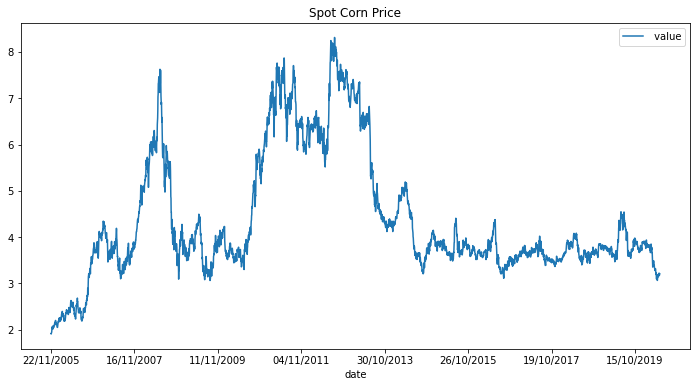

In [36]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('CornPrice1.csv', header=0, index_col=0)
print(series.head())
series.plot(figsize=(12,6), title="Spot Corn Price")
pyplot.show()

Training / Test Data Set Split



In [40]:
# Split the Data - here we have 80/20 split (lots of data)

X = series.values
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))


Observations: 3649
Training Observations: 2919
Testing Observations: 730


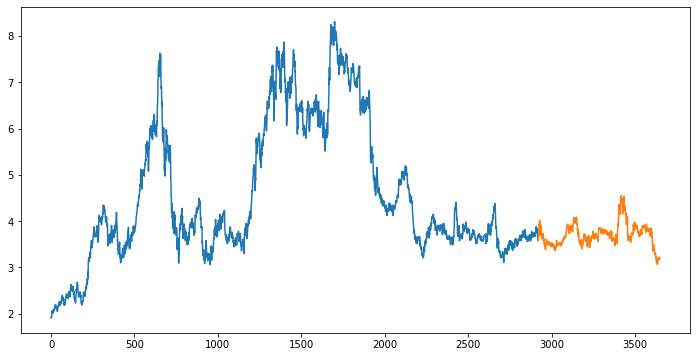

In [41]:
fig = pyplot.figure(figsize=(12,6))

pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()


Multiple Train-Test Splits

Observations: 1825
Training Observations: 913
Testing Observations: 912
Observations: 2737
Training Observations: 1825
Testing Observations: 912
Observations: 3649
Training Observations: 2737
Testing Observations: 912


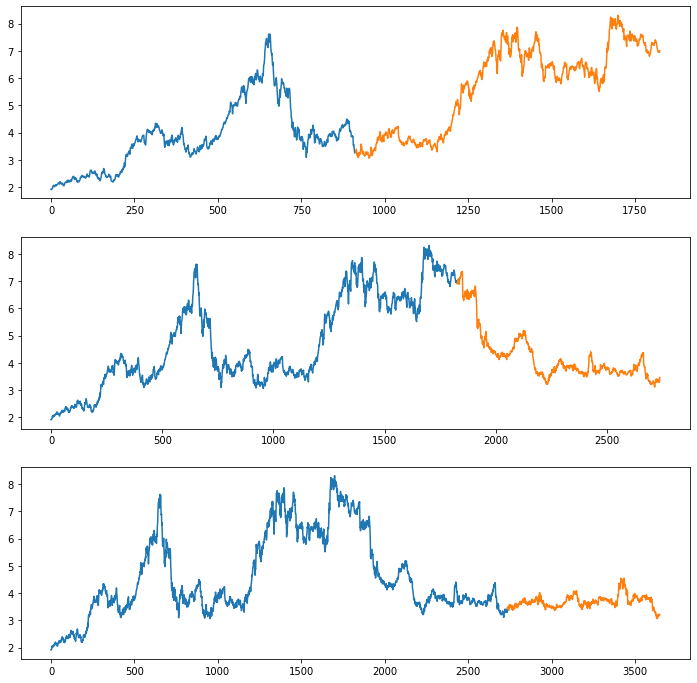

In [42]:
from sklearn.model_selection import TimeSeriesSplit
fig = pyplot.figure(figsize=(12,12))

X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(310 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

Walk-Forward Test/Train Split

In [0]:
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
	train, test = X[0:i], X[i:i+1]
	print('train=%d, test=%d' % (len(train), len(test)))

this create many models that are created but we gain a far more robust estimation of how the chosen model and parameters will perform in practice.

Walk-Forward is the gold standard in time series model evaluation.